In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score#cross validation 
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [100]:
#Load The Dataset That is on .CSV FIle 
data=pd.read_csv('/content/drive/MyDrive/project/Dataset/census.csv')

In [101]:
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [102]:
#Check The Shape Of The Dataset 
data.shape

(48842, 15)

In [103]:
#Check the Keys that have in dataset 
data.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [104]:
#Check  the datatyes For the Feature 
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [105]:
#Check info of dataset that have object or int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Data Cleaning 

In [106]:
#Change the ? With nan value 
data=data.replace('?',np.nan)

In [107]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [108]:
#To Check The NuLL Values If Dataset Have 
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [109]:
#Drop the data that For those rows that have nan value  
data=data.dropna()

In [110]:
data.shape

(45222, 15)

In [111]:
#To Check That dataset have nan or missing value have or not 
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

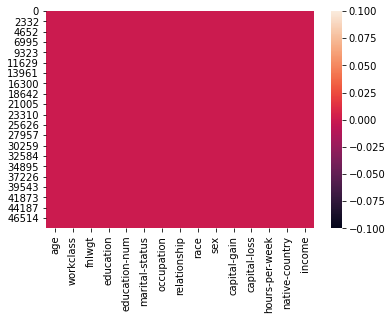

In [112]:
#To Check That dataset have nan or missing value have or not 
sns.heatmap(data.isnull())

In [113]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [114]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [115]:
data[Numerical].describe()#Describe the dataset Column Value 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Visualisation of  Categorical Datatype

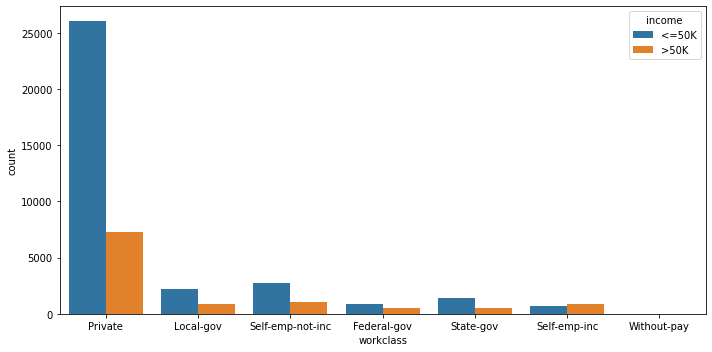

In [116]:
#Workclass Vs Income 
fig = plt.figure(figsize=(10,5))
sns.countplot('workclass', hue='income', data=data)
plt.tight_layout()
plt.show()

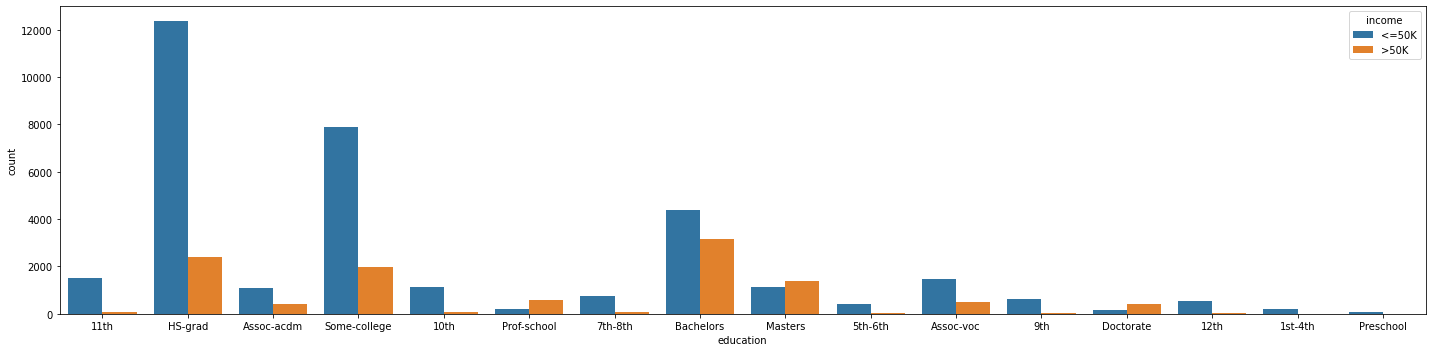

In [117]:
#Education VS Income 
fig = plt.figure(figsize=(20,5))
sns.countplot('education', hue='income', data=data)
plt.tight_layout()
plt.show()


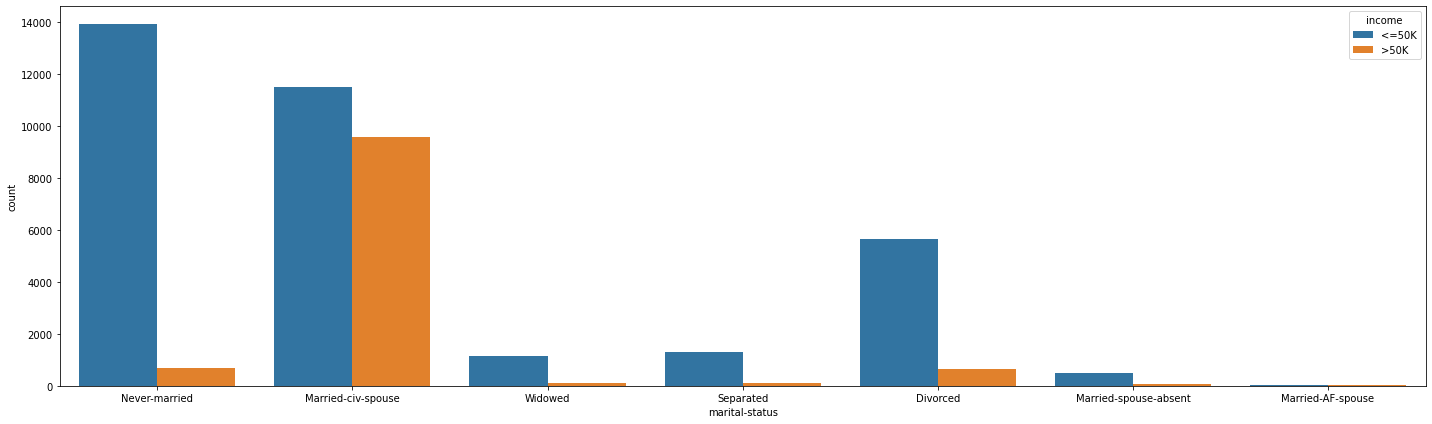

In [118]:
#Martial_Status Vs Income 
fig = plt.figure(figsize=(20,6))
sns.countplot('marital-status', hue='income', data=data)
plt.tight_layout()
plt.show()

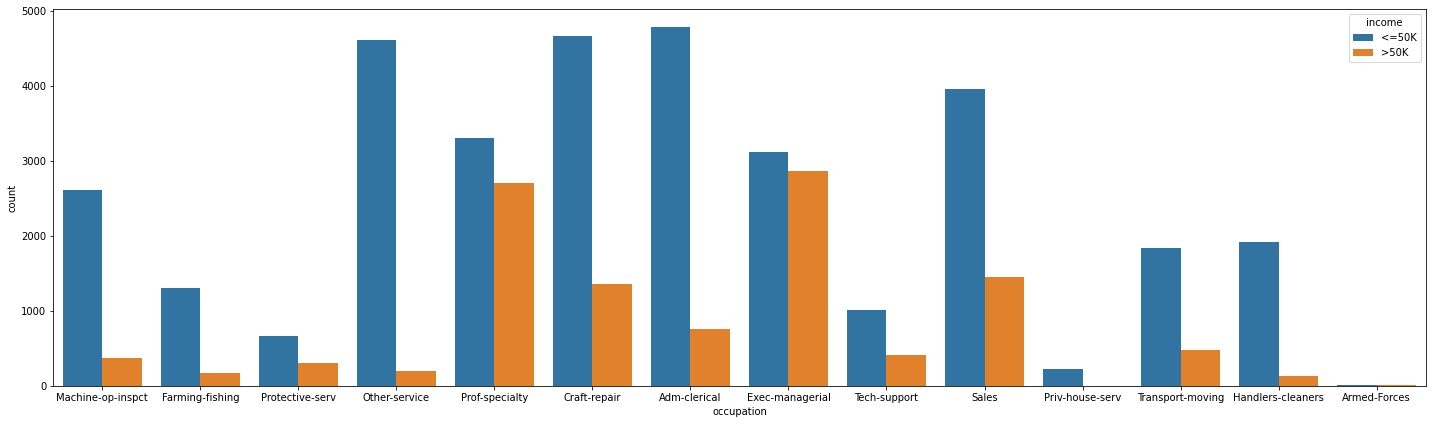

In [119]:
#Occupation Vs Income 
fig = plt.figure(figsize=(20,6))
sns.countplot('occupation', hue='income', data=data)
plt.tight_layout()
plt.show()

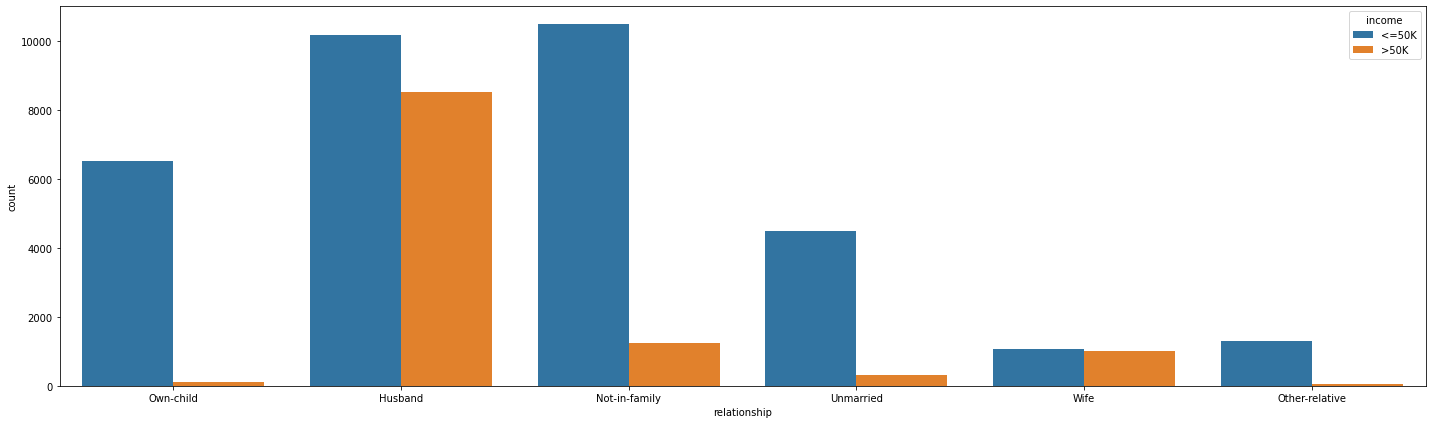

In [120]:
#Relationship Vs Income 
fig = plt.figure(figsize=(20,6))
sns.countplot('relationship', hue='income', data=data)
plt.tight_layout()
plt.show()

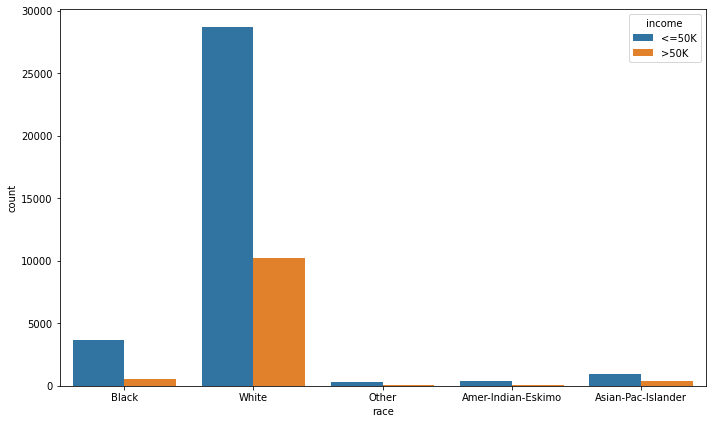

In [121]:
#Race Vs Income 
fig = plt.figure(figsize=(10,6))
sns.countplot('race', hue='income', data=data)
plt.tight_layout()
plt.show()

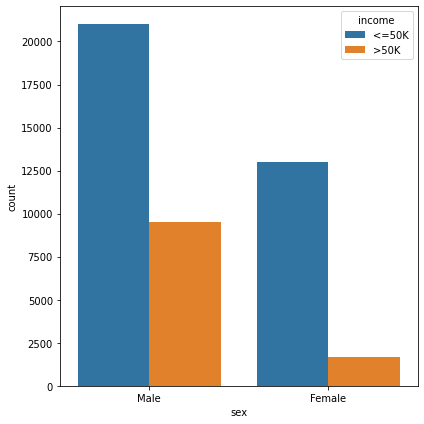

In [122]:
#Sex Vs Income 
fig = plt.figure(figsize=(6,6))
sns.countplot('sex', hue='income', data=data)
plt.tight_layout()
plt.show()

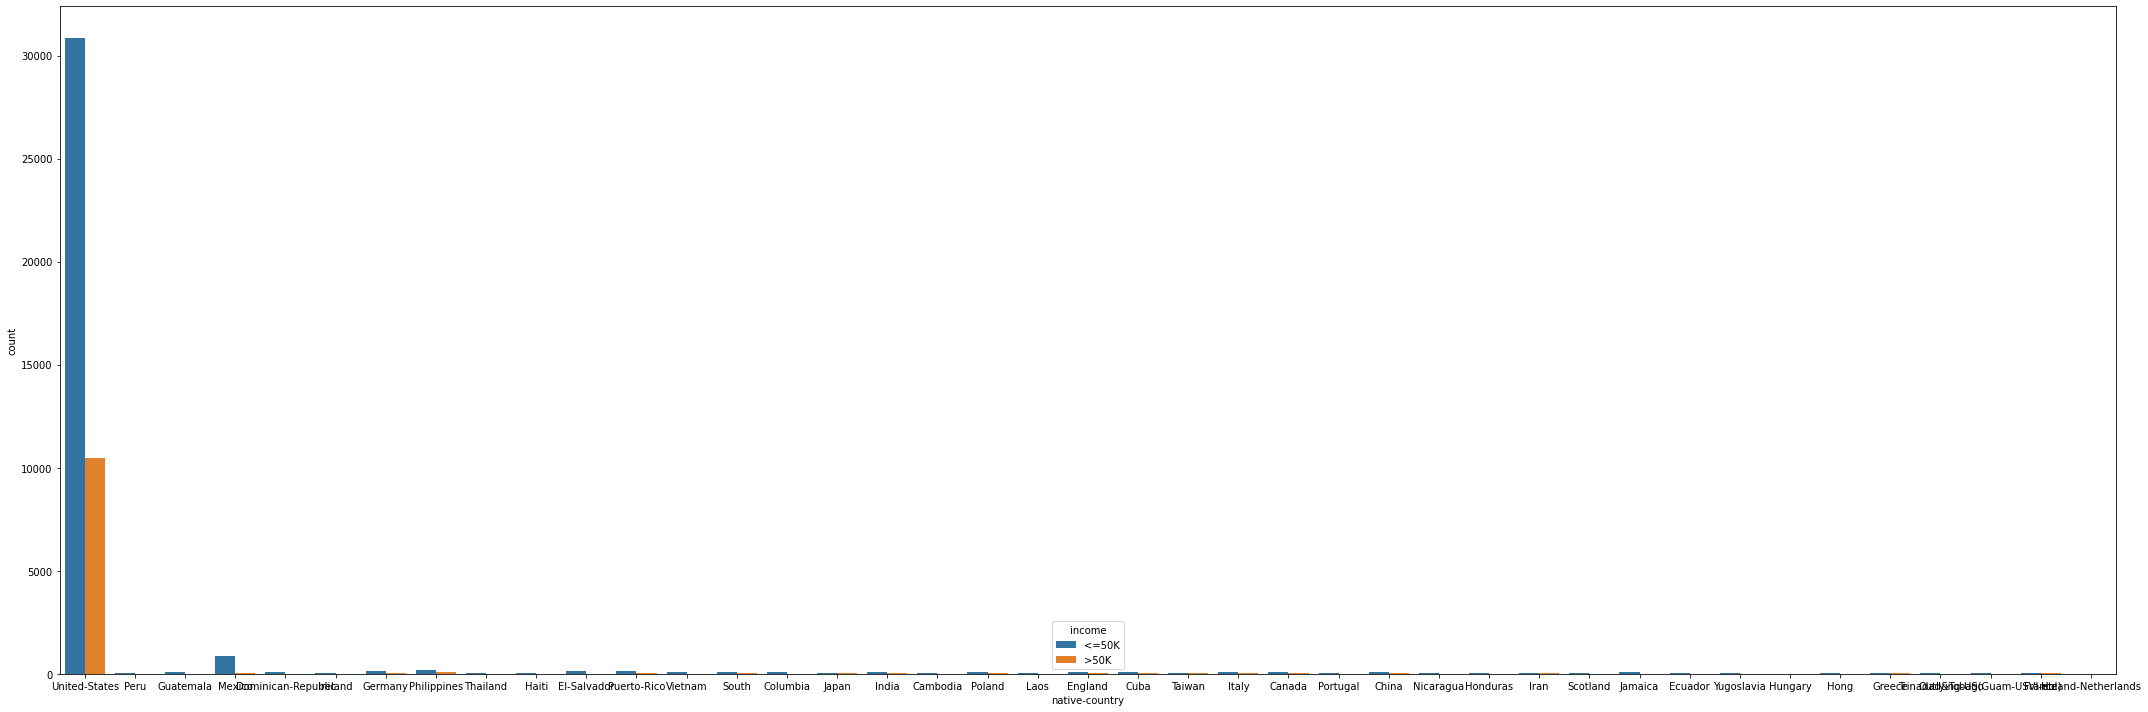

In [123]:
#NAtive-Country Vs income 
fig = plt.figure(figsize=(30,10))
sns.countplot('native-country', hue='income', data=data)
plt.tight_layout()
plt.show()

**Visualization of Numerical Data **

In [124]:
#Label Encoder is use to convert string column value into integer 
from sklearn import preprocessing
lb=preprocessing.LabelEncoder()

In [125]:
data['sex']=lb.fit_transform(data['sex'])
data['income']=lb.fit_transform(data['income'])

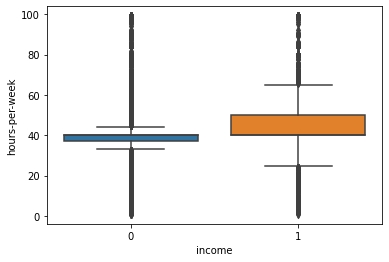

In [126]:
sns.boxplot(y='hours-per-week',x='income',data=data)

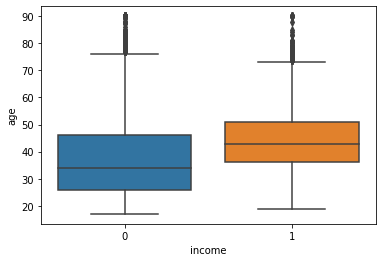

In [127]:
sns.boxplot(y='age',x='income',data=data)

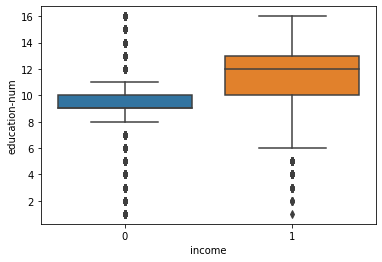

In [128]:
sns.boxplot(y='education-num',x='income',data=data)

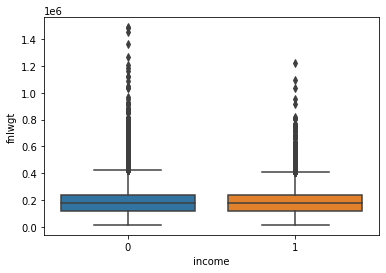

In [129]:
sns.boxplot(y='fnlwgt',x='income',data=data)

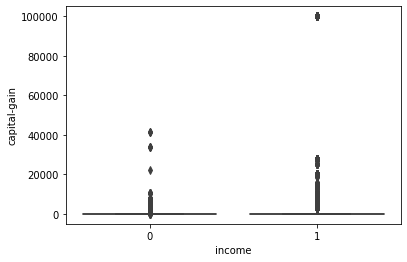

In [130]:
sns.boxplot(y='capital-gain',x='income',data=data)

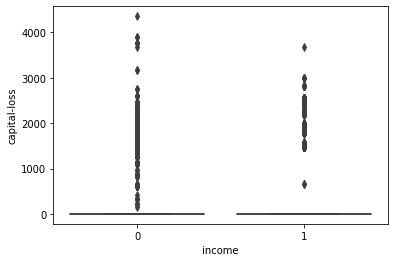

In [131]:
sns.boxplot(y='capital-loss',x='income',data=data)

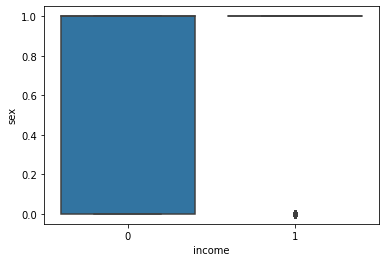

In [132]:
sns.boxplot(y='sex',x='income',data=data)

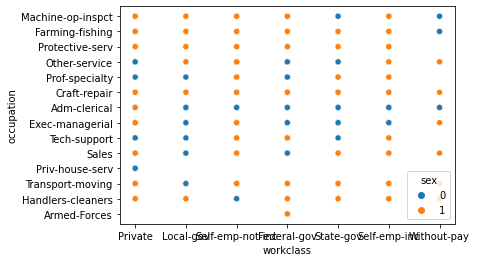

In [133]:
sns.scatterplot(x='workclass',y='occupation',hue='sex',data=data)#Plot the Graph 

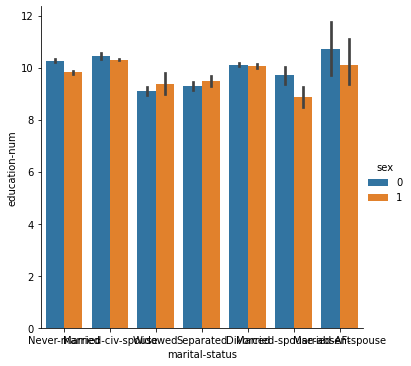

In [134]:
sns.catplot(x='marital-status',y='education-num',hue='sex',kind='bar',data=data)

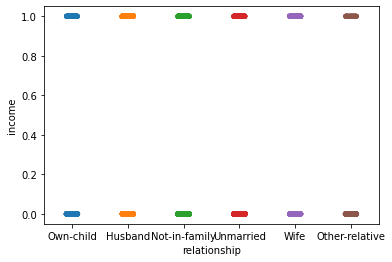

In [135]:
sns.stripplot(y="income",x="relationship",data=data)

In [136]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

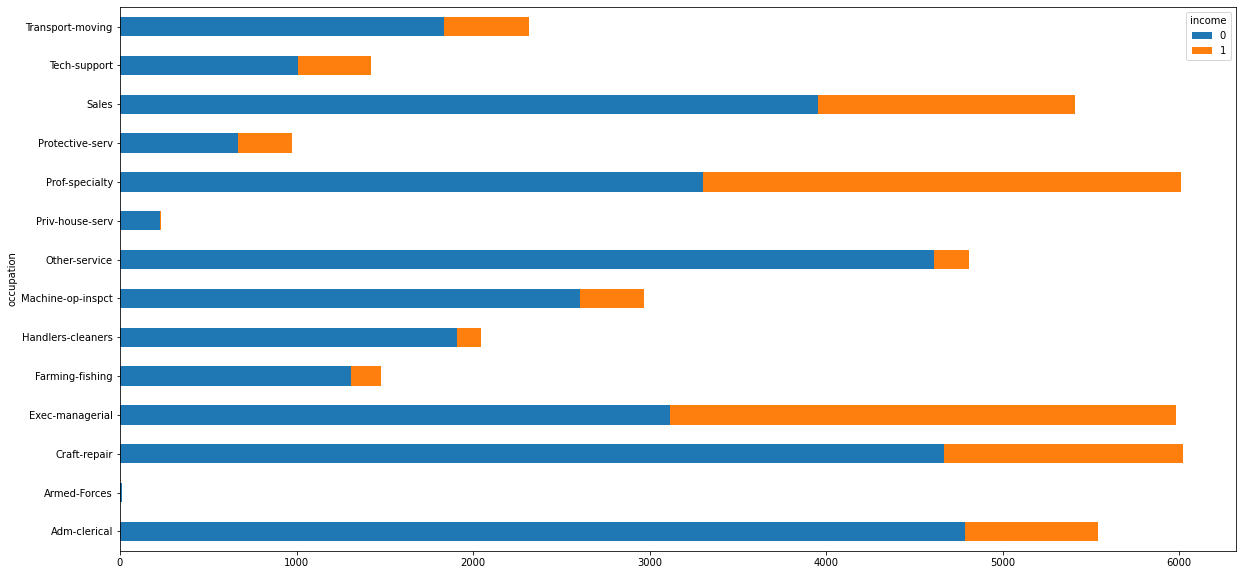

In [137]:
data[data['income'] == ' >50K']['occupation'].value_counts().head(3)
pd.crosstab(data["occupation"], data['income']).plot(kind='barh', stacked=True, figsize=(20, 10))

# Outliear Detection using BoxPlot Graph

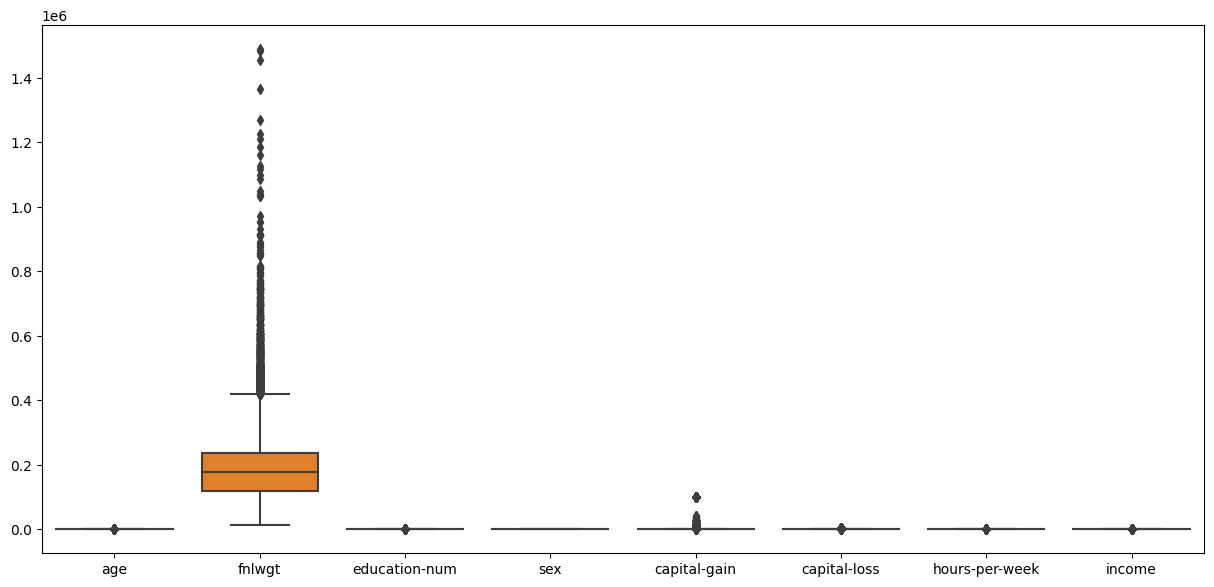

In [138]:
#Usnig the Box plot 
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']])

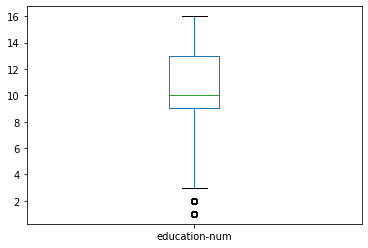

In [139]:
data['education-num'].plot.box()

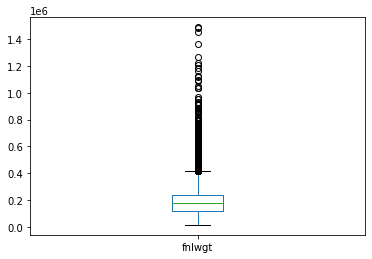

In [140]:
data['fnlwgt'].plot.box()

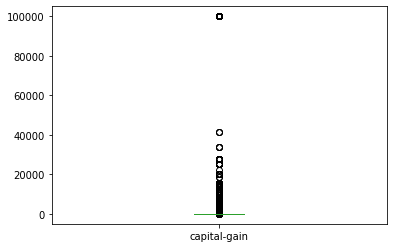

In [141]:
data['capital-gain'].plot.box()

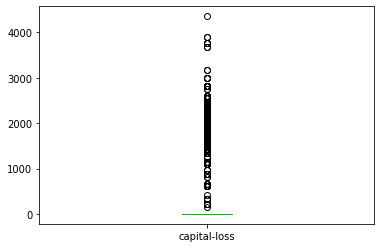

In [142]:
data['capital-loss'].plot.box()

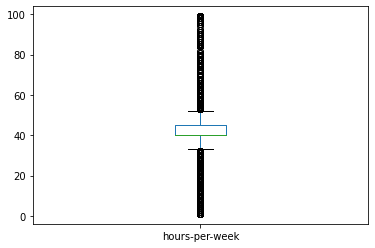

In [143]:
data['hours-per-week'].plot.box()

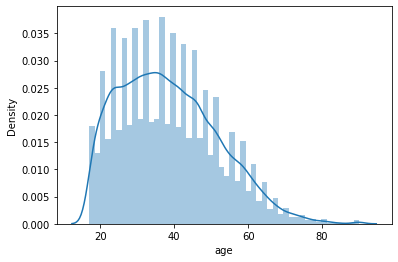

In [144]:
sns.distplot(data['age'])#Also use the Distplot TO check the outliers 

In [145]:
data['race']=lb.fit_transform(data['race'])
data['native-country']=lb.fit_transform(data['native-country'])
data['occupation']=lb.fit_transform(data['occupation'])
data['workclass']=lb.fit_transform(data['workclass'])
data['relationship']=lb.fit_transform(data['relationship'])
data['marital-status']=lb.fit_transform(data['marital-status'])
data['education']=lb.fit_transform(data['education'])

In [146]:
data['income'].unique()

array([0, 1])

In [147]:
data['occupation'].unique()

array([ 6,  4, 10,  7,  9,  2,  0,  3, 12, 11,  8, 13,  5,  1])

In [148]:
data['native-country'].unique()

array([38, 28, 12, 25,  5, 20, 10, 29, 36, 13,  7, 32, 39, 34,  3, 23, 18,
        0, 30, 24,  8,  4, 35, 21,  1, 31,  2, 26, 15, 19, 33, 22,  6, 40,
       17, 16, 11, 37, 27,  9, 14])

In [149]:
data['race'].unique()

array([2, 4, 3, 0, 1])

In [150]:
from scipy import stats #Z-Score used to remove the Outliers 
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[1.02498291 0.2134431  0.35088942 ... 0.07812006 0.26299899 0.57403082]
 [0.04145504 0.2134431  0.94587846 ... 0.7547014  0.26299899 0.57403082]
 [0.79801494 1.25716323 1.39359159 ... 0.07812006 0.26299899 1.74206675]
 ...
 [1.47166476 0.2134431  0.35805983 ... 0.07812006 0.26299899 0.57403082]
 [1.25195088 0.2134431  0.11127873 ... 1.74376299 0.26299899 0.57403082]
 [1.01772882 0.83027703 0.92951628 ... 0.07812006 0.26299899 1.74206675]]


In [151]:
threshold = 3.5 #Set the threshold Values 
print(np.where(z > 3.5))

(array([   20,    31,    46, ..., 45176, 45185, 45212]), array([12, 13, 11, ..., 13, 10,  8]))


In [152]:
data= data[(z < 3.5).all(axis=1)]

In [153]:
data.shape#Before Outliers Remove shape of Dataset 

(40616, 15)

In [154]:
data.skew()#Before Remove the outliers the skewness in the dataset 

age                0.501824
workclass          1.167867
fnlwgt             0.736771
education         -0.948424
education-num     -0.242272
marital-status    -0.031353
occupation         0.114603
relationship       0.799148
race              -2.468457
sex               -0.719351
capital-gain       5.032513
capital-loss      15.257136
hours-per-week    -0.169190
native-country    -4.651789
income             1.277889
dtype: float64

In [155]:
data.shape#After Removing the Outliers the Shape of Datset

(40616, 15)

In [156]:
data.skew()#Check the skewness of Dataset After REmoving the Datset 

age                0.501824
workclass          1.167867
fnlwgt             0.736771
education         -0.948424
education-num     -0.242272
marital-status    -0.031353
occupation         0.114603
relationship       0.799148
race              -2.468457
sex               -0.719351
capital-gain       5.032513
capital-loss      15.257136
hours-per-week    -0.169190
native-country    -4.651789
income             1.277889
dtype: float64

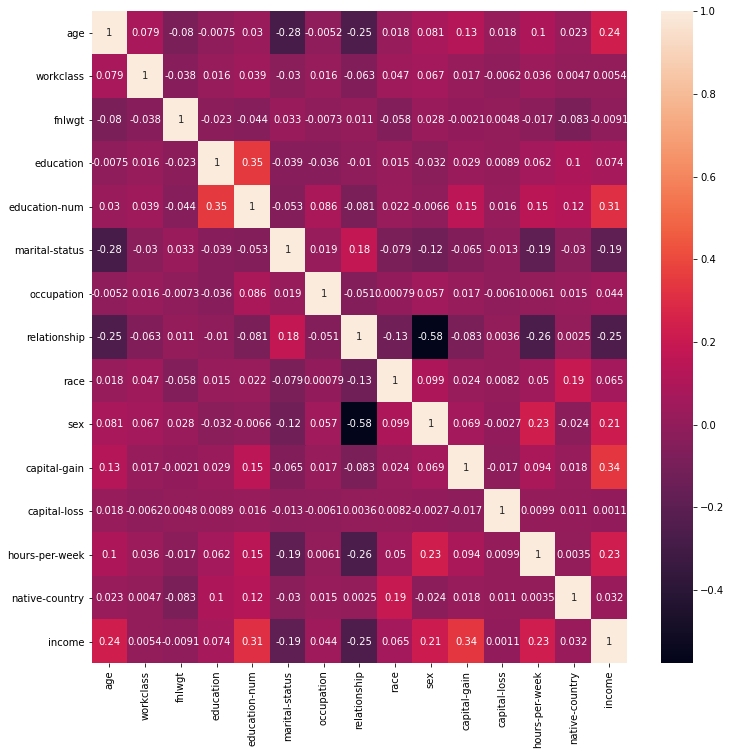

In [157]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, )
plt.show()

In [158]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [159]:
x=data[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       ]].copy()

In [160]:
y=data['income'] #Y have Targeted Value

In [161]:
# Important feature using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features = 2) 
selection=selection.fit(x, y)

In [162]:
feature_importance = selection.feature_importances_ 


In [163]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        selection.estimators_], 
                                        axis = 0)

In [164]:
print(selection.feature_importances_)

[0.19340725 0.04058544 0.1872983  0.03558436 0.078938   0.05021693
 0.07300579 0.1020075  0.01212386 0.03595949 0.07590131 0.002003
 0.10343769 0.00953107]


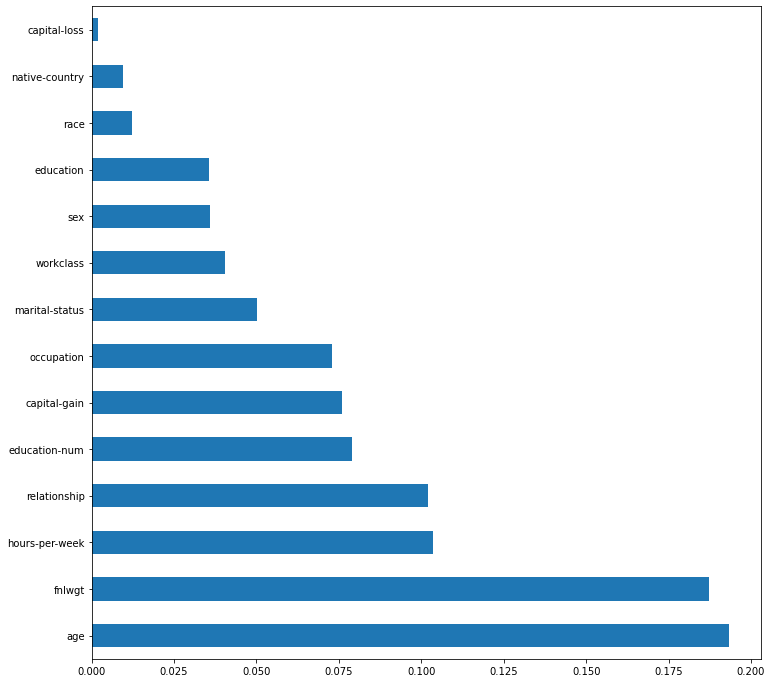

In [165]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,12))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [166]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(selection, prefit=True)
x = selector.transform(x)

In [167]:
y=y.values.reshape(-1,1)#Reshape the targeted Value 

In [168]:
y.shape

(40616, 1)

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65,test_size=0.35,random_state=1)#Split the Dataset x and Y into x_tran 

In [170]:
x_train.shape

(26400, 7)

In [171]:
x_test.shape

(14216, 7)

In [172]:
y_train.shape

(26400, 1)

In [173]:
y_test.shape

(14216, 1)

In [174]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=5)
lr.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
pred=lr.predict(x_test)#Pred
print(' prediction \n',pred)#Print Prediction Value 
lr=print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [1 1 0 ... 0 0 1]
accuracy score
 0.800436128306134
confusion metrix
 [[10712  2620]
 [  217   667]]
classification Report 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     13332
           1       0.20      0.75      0.32       884

    accuracy                           0.80     14216
   macro avg       0.59      0.78      0.60     14216
weighted avg       0.93      0.80      0.85     14216



In [176]:
from sklearn.naive_bayes import GaussianNB #Use GaussianNB Navie bye's Algorithem 
gnb = GaussianNB() 
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [177]:
pred=gnb.predict(x_test)#Pred
print(' prediction \n',pred)#Print Prediction Value 
gnb=print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [1 1 0 ... 1 0 1]
accuracy score
 0.7926280247608328
confusion metrix
 [[10557  2576]
 [  372   711]]
classification Report 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88     13133
           1       0.22      0.66      0.33      1083

    accuracy                           0.79     14216
   macro avg       0.59      0.73      0.60     14216
weighted avg       0.91      0.79      0.84     14216



In [178]:
from sklearn.neighbors import KNeighborsClassifier#KNN ALgorithem to learn the model for prediction 
knc = KNeighborsClassifier(n_neighbors=49)

In [179]:
knc.fit(x_train, y_train)#Fit the model 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [180]:
score=cross_val_score(knc,x,y,cv=5)
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(knc,x,y,cv=5)
print('prediction \n',y_pred)
confu=confusion_matrix(y,y_pred)
print('confusion matrix \n',confu)

score of mean 
 0.8029595074207716
score of standard devition 
 0.0019341947835484867
prediction 
 [0 0 0 ... 0 0 1]
confusion matrix 
 [[31104   138]
 [ 7865  1509]]


In [181]:
pred=knc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
knc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 0 0 ... 0 0 1]
accuracy score
 0.8033905458638154
confusion metrix
 [[10894  2760]
 [   35   527]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     13654
           1       0.16      0.94      0.27       562

    accuracy                           0.80     14216
   macro avg       0.58      0.87      0.58     14216
weighted avg       0.96      0.80      0.86     14216



In [182]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [183]:
pred=svc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
svc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 0 ... 0 0 0]
accuracy score
 0.8037422622397299
confusion metrix
 [[10912  2773]
 [   17   514]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     13685
           1       0.16      0.97      0.27       531

    accuracy                           0.80     14216
   macro avg       0.58      0.88      0.58     14216
weighted avg       0.97      0.80      0.86     14216



In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
tree= DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [187]:
score=cross_val_score(tree,x,y,cv=5,scoring='accuracy')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(tree,x,y,cv=5)
print('prediction \n',y_pred)


score of mean 
 0.8024915211488942
score of standard devition 
 0.0035751591415950084
prediction 
 [0 0 1 ... 0 0 1]


In [188]:
pred=tree.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
tree=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 0 0 ... 1 0 1]
accuracy score
 0.7972706809229038
confusion metrix
 [[9462 1415]
 [1467 1872]]
classification Report 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     10877
           1       0.57      0.56      0.57      3339

    accuracy                           0.80     14216
   macro avg       0.72      0.72      0.72     14216
weighted avg       0.80      0.80      0.80     14216



In [189]:
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=14, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
pred=b.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
b=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 0 0 ... 1 0 0]
accuracy score
 0.8451744513224536
confusion metrix
 [[10517  1789]
 [  412  1498]]
classification Report 
               precision    recall  f1-score   support

           0       0.96      0.85      0.91     12306
           1       0.46      0.78      0.58      1910

    accuracy                           0.85     14216
   macro avg       0.71      0.82      0.74     14216
weighted avg       0.89      0.85      0.86     14216



In [191]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5,max_features=0.5)
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.5, max_samples=0.5, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [192]:
pred=bagging.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
bagging=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 1 ... 0 0 0]
accuracy score
 0.8085256049521665
confusion metrix
 [[10442  2235]
 [  487  1052]]
classification Report 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88     12677
           1       0.32      0.68      0.44      1539

    accuracy                           0.81     14216
   macro avg       0.64      0.75      0.66     14216
weighted avg       0.89      0.81      0.84     14216



In [193]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=200,learning_rate=.02)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [194]:
pred=GBC.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
GBC=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 0 1 ... 1 0 1]
accuracy score
 0.8485509285312324
confusion metrix
 [[10466  1690]
 [  463  1597]]
classification Report 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     12156
           1       0.49      0.78      0.60      2060

    accuracy                           0.85     14216
   macro avg       0.72      0.82      0.75     14216
weighted avg       0.89      0.85      0.86     14216



In [198]:
from sklearn.externals import joblib#For Saving the Best model Joblib 
joblib.dump(GBC,'census.pkl')

['census.pkl']